In [1]:
from os import listdir
from xml.etree import ElementTree
from numpy import zeros
from numpy import asarray
from matplotlib import pyplot

In [2]:
from mrcnn.utils import Dataset
from mrcnn.visualize import display_instances
from mrcnn.utils import extract_bboxes

In [3]:
class pascal(Dataset):
    def load_dataset(self, dataset_dir, is_train=True):
        # define classes
        self.add_class("dataset", 1, "person")
        self.add_class("dataset", 2, "bird")
        self.add_class("dataset", 3, "cat")
        self.add_class("dataset", 4, "cow")
        self.add_class("dataset", 5, "dog")
        self.add_class("dataset", 6, "horse")
        self.add_class("dataset", 7, "sheep")
        self.add_class("dataset", 8, "aeroplane")
        self.add_class("dataset", 9, "bicycle")
        self.add_class("dataset", 10, "boat")
        self.add_class("dataset", 11, "bus")
        self.add_class("dataset", 12, "car")
        self.add_class("dataset", 13, "motorbike")
        self.add_class("dataset", 14, "train")
        self.add_class("dataset", 15, "bottle")
        self.add_class("dataset", 16, "chair")
        self.add_class("dataset", 17, "dining table")
        self.add_class("dataset", 18, "potted plant")
        self.add_class("dataset", 19, "sofa")
        self.add_class("dataset", 20, "tv/monitor")
        
         # define data locations
        images_dir = dataset_dir + '/JPEGImages/'
        annotations_dir = dataset_dir + '/Annotations/'
        
        # find all images
        for filename in listdir(images_dir):
            print(filename)
            # extract image id
            image_id = filename[:-4]
            print('IMAGE ID: ',image_id)
            
            #skip all images after 115 if we are building the train set
            #if is_train and int(image_id) >= 250:
               # continue
               # skip all images before 115 if we are building the test/val set
            #if not is_train and int(image_id) < 250:
                #continue
                
            img_path = images_dir + filename
            ann_path = annotations_dir + image_id + '.xml'
            
            # add to dataset
            self.add_image('dataset', image_id=image_id, path=img_path, annotation=ann_path, class_ids = [0,1,2,3])
    
    def extract_boxes(self, filename):
        # load and parse the file
        tree = ElementTree.parse(filename)
        # get the root of the document
        root = tree.getroot()
        # extract each bounding box
        boxes = list()
        for box in root.findall('.//object'):
            name = box.find('name').text   #Add label name to the box list
            xmin = int(float(box.find('./bndbox/xmin').text))
            ymin = int(float(box.find('./bndbox/ymin').text))
            xmax = int(float(box.find('./bndbox/xmax').text))
            ymax = int(float(box.find('./bndbox/ymax').text))
            coors = [xmin, ymin, xmax, ymax, name]
            boxes.append(coors)
        # extract image dimensions
        width = int(root.find('.//size/width').text)
        height = int(root.find('.//size/height').text)
        return boxes, width, height

    # load the masks for an image
    def load_mask(self, image_id):
        # get details of image
        info = self.image_info[image_id]
        # define box file location
        path = info['annotation']
        #return info, path
        
        
        # load XML
        boxes, w, h = self.extract_boxes(path)
        # create one array for all masks, each on a different channel
        masks = zeros([h, w, len(boxes)], dtype='uint8')
        # create masks
        class_ids = list()
        for i in range(len(boxes)):
            box = boxes[i]
            row_s, row_e = box[1], box[3]
            col_s, col_e = box[0], box[2]
            
            # box[4] will have the name of the class 
            if (box[4] == 'person'):
                masks[row_s:row_e, col_s:col_e, i] = 1
                class_ids.append(self.class_names.index('person'))
            elif(box[4] == 'bird'):
                masks[row_s:row_e, col_s:col_e, i] = 2
                class_ids.append(self.class_names.index('bird')) 
            elif(box[4] == 'cat'):
                masks[row_s:row_e, col_s:col_e, i] = 3
                class_ids.append(self.class_names.index('cat'))
            elif(box[4] == 'cow'):
                masks[row_s:row_e, col_s:col_e, i] = 4
                class_ids.append(self.class_names.index('cow'))
            elif(box[4] == 'dog'):
                masks[row_s:row_e, col_s:col_e, i] = 5
                class_ids.append(self.class_names.index('dog'))
            elif(box[4] == 'horse'):
                masks[row_s:row_e, col_s:col_e, i] = 6
                class_ids.append(self.class_names.index('horse'))
            elif(box[4] == 'sheep'):
                masks[row_s:row_e, col_s:col_e, i] = 7
                class_ids.append(self.class_names.index('sheep'))
            elif(box[4] == 'aeroplane'):
                masks[row_s:row_e, col_s:col_e, i] = 8
                class_ids.append(self.class_names.index('aeroplane'))
            elif(box[4] == 'bicycle'):
                masks[row_s:row_e, col_s:col_e, i] = 9
                class_ids.append(self.class_names.index('bicycle'))
            elif(box[4] == 'boat'):
                masks[row_s:row_e, col_s:col_e, i] = 10
                class_ids.append(self.class_names.index('boat'))
            elif(box[4] == 'bus'):
                masks[row_s:row_e, col_s:col_e, i] = 11
                class_ids.append(self.class_names.index('bus'))
            elif(box[4] == 'car'):
                masks[row_s:row_e, col_s:col_e, i] = 12
                class_ids.append(self.class_names.index('car'))
            elif(box[4] == 'motorbike'):
                masks[row_s:row_e, col_s:col_e, i] = 13
                class_ids.append(self.class_names.index('motorbike'))   
            elif(box[4] == 'train'):
                masks[row_s:row_e, col_s:col_e, i] = 14
                class_ids.append(self.class_names.index('train'))
            elif(box[4] == 'bottle'):
                masks[row_s:row_e, col_s:col_e, i] = 15
                class_ids.append(self.class_names.index('bottle'))                                            
            elif(box[4] == 'chair'):
                masks[row_s:row_e, col_s:col_e, i] = 16
                class_ids.append(self.class_names.index('chair'))
            elif(box[4] == 'dining table'):
                masks[row_s:row_e, col_s:col_e, i] = 17
                class_ids.append(self.class_names.index('dining table'))
            elif(box[4] == 'potted plant'):
                masks[row_s:row_e, col_s:col_e, i] = 18
                class_ids.append(self.class_names.index('potted plant'))
            elif(box[4] == 'sofa'):
                masks[row_s:row_e, col_s:col_e, i] = 19
                class_ids.append(self.class_names.index('sofa'))
            elif(box[4] == 'tv/monitor'):
                masks[row_s:row_e, col_s:col_e, i] = 20
                class_ids.append(self.class_names.index('tv/monitor'))
                                                        
        return masks, asarray(class_ids, dtype='int32')
        

    # load an image reference
    def image_reference(self, image_id):
        info = self.image_info[image_id]
        return info['path']

In [4]:
dataset_dir='D:\Transfer_Learning\VOCdevkit\VOC2008'

In [5]:
train_set = pascal()
train_set.load_dataset(dataset_dir, is_train=True)
train_set.prepare()
print('Train: %d' % len(train_set.image_ids))

0001.jpg
IMAGE ID:  0001
0002.jpg
IMAGE ID:  0002
0003.jpg
IMAGE ID:  0003
0004.jpg
IMAGE ID:  0004
0005.jpg
IMAGE ID:  0005
0006.jpg
IMAGE ID:  0006
0007.jpg
IMAGE ID:  0007
0008.jpg
IMAGE ID:  0008
0009.jpg
IMAGE ID:  0009
0010.jpg
IMAGE ID:  0010
0011.jpg
IMAGE ID:  0011
0012.jpg
IMAGE ID:  0012
0013.jpg
IMAGE ID:  0013
0014.jpg
IMAGE ID:  0014
0015.jpg
IMAGE ID:  0015
0016.jpg
IMAGE ID:  0016
0017.jpg
IMAGE ID:  0017
0018.jpg
IMAGE ID:  0018
0019.jpg
IMAGE ID:  0019
0020.jpg
IMAGE ID:  0020
0021.jpg
IMAGE ID:  0021
0022.jpg
IMAGE ID:  0022
0023.jpg
IMAGE ID:  0023
0024.jpg
IMAGE ID:  0024
0025.jpg
IMAGE ID:  0025
0026.jpg
IMAGE ID:  0026
0027.jpg
IMAGE ID:  0027
0028.jpg
IMAGE ID:  0028
0029.jpg
IMAGE ID:  0029
0030.jpg
IMAGE ID:  0030
0031.jpg
IMAGE ID:  0031
0032.jpg
IMAGE ID:  0032
0033.jpg
IMAGE ID:  0033
0034.jpg
IMAGE ID:  0034
0035.jpg
IMAGE ID:  0035
0036.jpg
IMAGE ID:  0036
0037.jpg
IMAGE ID:  0037
0038.jpg
IMAGE ID:  0038
0039.jpg
IMAGE ID:  0039
0040.jpg
IMAGE ID:  0040


In [6]:
test_set = pascal()
test_set.load_dataset(dataset_dir, is_train=False)
test_set.prepare()
print('Test: %d' % len(test_set.image_ids))

0001.jpg
IMAGE ID:  0001
0002.jpg
IMAGE ID:  0002
0003.jpg
IMAGE ID:  0003
0004.jpg
IMAGE ID:  0004
0005.jpg
IMAGE ID:  0005
0006.jpg
IMAGE ID:  0006
0007.jpg
IMAGE ID:  0007
0008.jpg
IMAGE ID:  0008
0009.jpg
IMAGE ID:  0009
0010.jpg
IMAGE ID:  0010
0011.jpg
IMAGE ID:  0011
0012.jpg
IMAGE ID:  0012
0013.jpg
IMAGE ID:  0013
0014.jpg
IMAGE ID:  0014
0015.jpg
IMAGE ID:  0015
0016.jpg
IMAGE ID:  0016
0017.jpg
IMAGE ID:  0017
0018.jpg
IMAGE ID:  0018
0019.jpg
IMAGE ID:  0019
0020.jpg
IMAGE ID:  0020
0021.jpg
IMAGE ID:  0021
0022.jpg
IMAGE ID:  0022
0023.jpg
IMAGE ID:  0023
0024.jpg
IMAGE ID:  0024
0025.jpg
IMAGE ID:  0025
0026.jpg
IMAGE ID:  0026
0027.jpg
IMAGE ID:  0027
0028.jpg
IMAGE ID:  0028
0029.jpg
IMAGE ID:  0029
0030.jpg
IMAGE ID:  0030
0031.jpg
IMAGE ID:  0031
0032.jpg
IMAGE ID:  0032
0033.jpg
IMAGE ID:  0033
0034.jpg
IMAGE ID:  0034
0035.jpg
IMAGE ID:  0035
0036.jpg
IMAGE ID:  0036
0037.jpg
IMAGE ID:  0037
0038.jpg
IMAGE ID:  0038
0039.jpg
IMAGE ID:  0039
0040.jpg
IMAGE ID:  0040


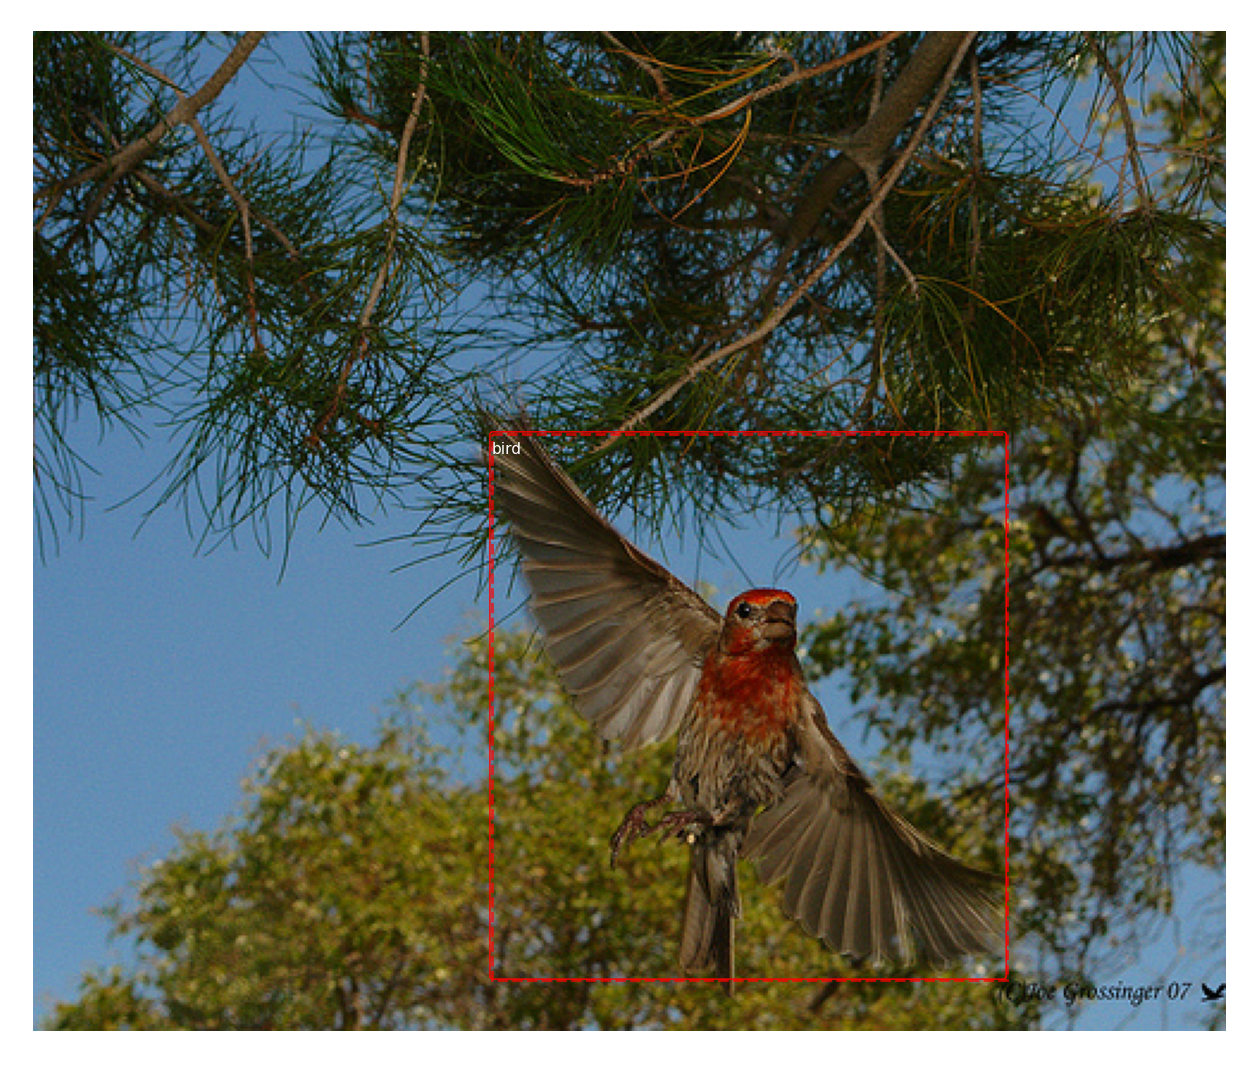

In [7]:
import random
num=random.randint(0, len(train_set.image_ids))
# define image id
image_id = num
# load the image
image = train_set.load_image(image_id)
# load the masks and the class ids
mask, class_ids = train_set.load_mask(image_id)
# extract bounding boxes from the masks
bbox = extract_bboxes(mask)
# display image with masks and bounding boxes

display_instances(image, bbox, mask, class_ids, train_set.class_names)

In [8]:
from mrcnn.config import Config
class PascalConfig(Config):
    # define the name of the configuration
    NAME = "Pacal_cfg"
    # number of classes (background + 3 fruits)
    NUM_CLASSES = 1 + 20
    # number of training steps per epoch
    STEPS_PER_EPOCH = 100

In [9]:
# prepare config
config = PascalConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     2
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 2
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                33
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE                     [28, 28]
MAX_GT_INSTA

In [10]:
import os
ROOT_DIR = os.path.abspath("./")
# Directory to save logs and trained model
DEFAULT_LOGS_DIR = os.path.join(ROOT_DIR, "logs")

In [11]:
from tensorflow.python.keras.layers import Layer, InputSpec
from keras.utils.layer_utils import get_source_inputs
import tensorflow.python.keras.engine

In [15]:
from mrcnn.model import MaskRCNN
# define the model
model = MaskRCNN(mode='training', model_dir="logs", config=config)
# load weights (mscoco) and exclude the output layers
model.load_weights("weights/mask_rcnn_coco.h5", by_name=True, exclude=["mrcnn_class_logits", "mrcnn_bbox_fc",  "mrcnn_bbox", "mrcnn_mask"])


In [ ]:
model.train(train_set, test_set, learning_rate=config.LEARNING_RATE, epochs=20, layers='heads')

In [ ]:
from matplotlib.patches import Rectangle


# define the prediction configuration
class PredictionConfig(Config):
    # define the name of the configuration
    NAME = "fruits_cfg"
    # number of classes (background + 3 fruits)
    NUM_CLASSES = 1 + 3
    # simplify GPU config
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

In [ ]:
from mrcnn.model import MaskRCNN
cfg = PredictionConfig()
# define the model
model = MaskRCNN(mode='inference', model_dir='logs', config=cfg)
# load model weights
model.load_weights('logs/mask_rcnn_fruits_cfg_0020.h5', by_name=True)